**Imports**

In [204]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import shapiro
import numpy as np

**Lendo o DataFrame**

In [205]:
df = pd.read_csv('/content/Desempenho_Escolar_Corrigido.csv')
df.head()

,Nota_Final,Horas_Estudo,Num_Livros,Faltas,Nota_Media_Anterior,Tempo_Sono,Nivel_Estresse,Faltas_Variavel,Equilibrio_Vida_Estudo,Horas_Estudo_Outlier,Num_Simulados,Nota_Passada,Horas_Videogame
0,16.599456,9.890115,5,16,4.196953,7.886352,7.904943,26,1.368938,9.890115,4,7.185572,2.033630
1,25.115333,5.495447,1,9,0.805869,9.186604,1.861121,28,5.293959,5.495447,3,6.677577,3.246115
2,5.094084,2.814473,3,5,0.825483,4.757503,8.968963,23,0.507127,2.814473,3,7.468304,3.205141
3,1.858906,0.772896,6,22,1.420267,4.238826,8.548218,11,0.624122,0.772896,6,6.708548,4.123225
4,23.171554,4.444695,2,1,3.180209,8.759010,1.804465,3,4.576815,4.444695,2,6.742929,2.050743


**Entendendo os dados**

In [206]:
df.describe()

,Nota_Final,Horas_Estudo,Num_Livros,Faltas,Nota_Media_Anterior,Tempo_Sono,Nivel_Estresse,Faltas_Variavel,Equilibrio_Vida_Estudo,Horas_Estudo_Outlier,Num_Simulados,Nota_Passada,Horas_Videogame
count,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000
mean,14.269885,4.807239,4.88000,15.846667,4.702485,7.132929,5.310994,14.413333,1.905119,5.008470,1.78000,7.141614,2.380606
std,7.789910,2.923712,2.72675,8.439072,2.875804,1.733395,2.551497,8.353906,1.534788,3.118699,1.37509,2.657026,1.368658
min,-3.714509,0.304733,1.00000,0.000000,0.014955,4.017033,1.040336,0.000000,0.191258,0.304733,0.00000,1.749565,0.029449
25%,7.893693,2.292936,2.00000,8.000000,2.171133,5.727074,3.085665,8.000000,0.905254,2.365380,1.00000,5.401825,1.166027
50%,14.397804,4.524659,5.00000,16.000000,4.371483,6.970295,5.246456,14.000000,1.403335,4.693416,2.00000,7.180712,2.365281
75%,20.003868,7.259810,7.75000,23.000000,7.294615,8.712048,7.435266,21.000000,2.443992,7.362256,3.00000,9.101501,3.581063
max,39.219660,9.907787,9.00000,29.000000,9.907034,9.970385,9.998052,29.000000,9.065865,17.219637,6.00000,12.641436,4.970417


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nota_Final              150 non-null    float64
 1   Horas_Estudo            150 non-null    float64
 2   Num_Livros              150 non-null    int64  
 3   Faltas                  150 non-null    int64  
 4   Nota_Media_Anterior     150 non-null    float64
 5   Tempo_Sono              150 non-null    float64
 6   Nivel_Estresse          150 non-null    float64
 7   Faltas_Variavel         150 non-null    int64  
 8   Equilibrio_Vida_Estudo  150 non-null    float64
 9   Horas_Estudo_Outlier    150 non-null    float64
 10  Num_Simulados           150 non-null    int64  
 11  Nota_Passada            150 non-null    float64
 12  Horas_Videogame         150 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 15.4 KB


verificando se há dados duplicados e nulos

In [208]:
df.duplicated().sum()

np.int64(0)

In [209]:
df.isnull().sum()

,0
Nota_Final,0
Horas_Estudo,0
Num_Livros,0
Faltas,0
Nota_Media_Anterior,0
Tempo_Sono,0
Nivel_Estresse,0
Faltas_Variavel,0
Equilibrio_Vida_Estudo,0
Horas_Estudo_Outlier,0


Conclusão não há dados duplicados nem dados nulos

retirando numeros negativos

In [210]:
df =df[df['Nota_Final']>=0]
df.shape

(146, 13)

### **verificando outliers**

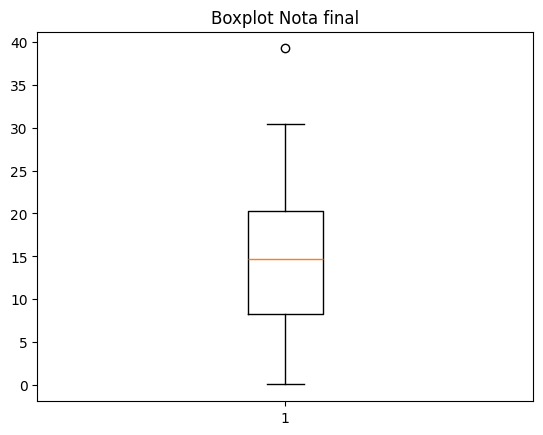

In [211]:
plt.boxplot(df['Nota_Final'])
plt.title('Boxplot Nota final')
plt.show()

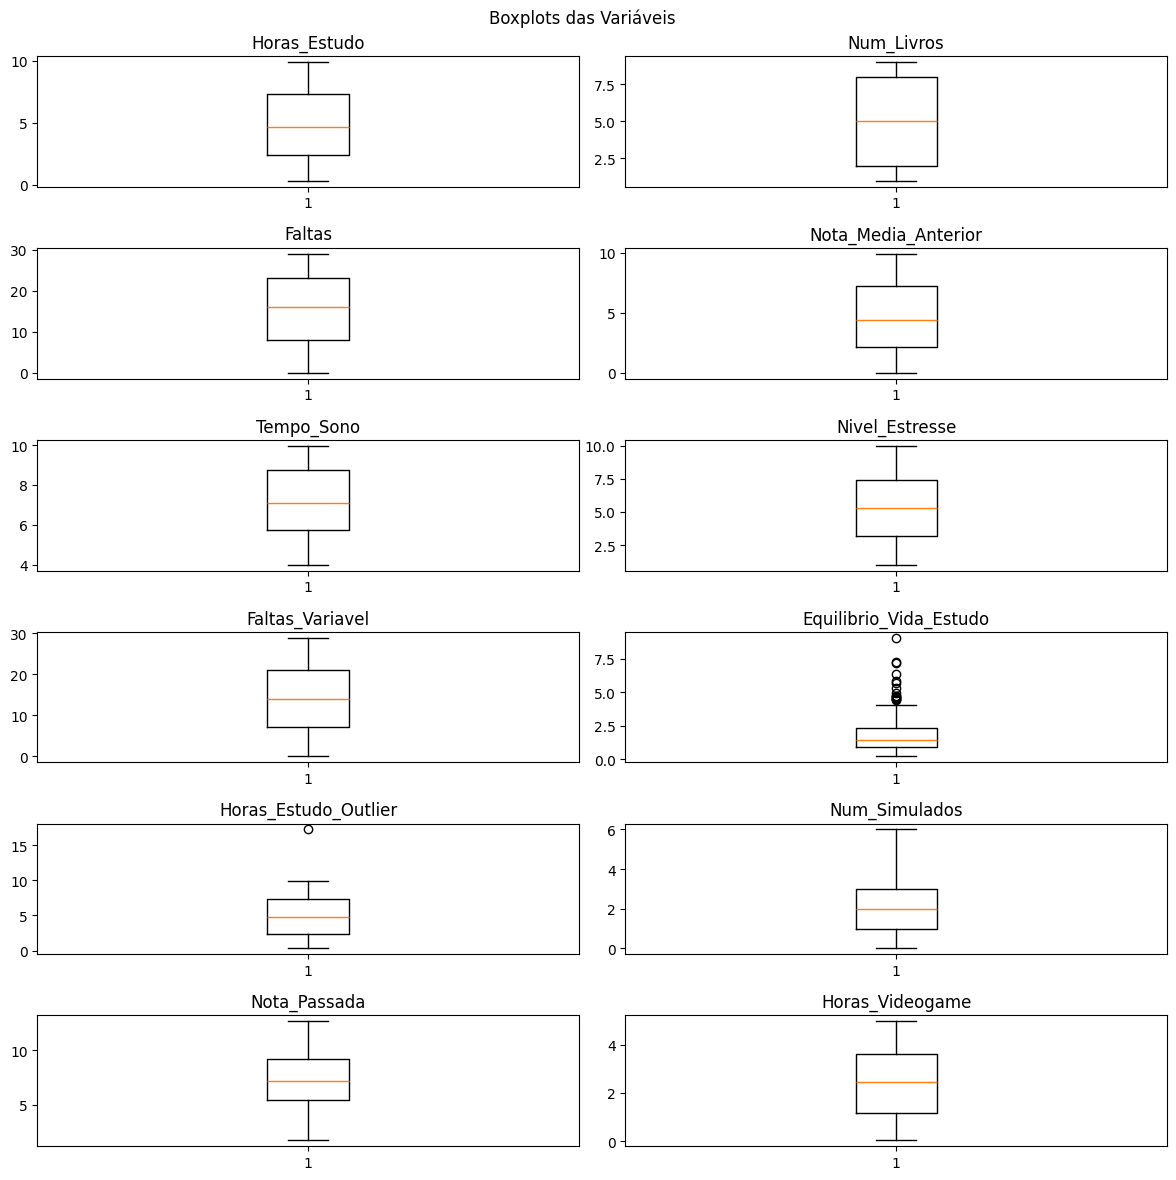

In [212]:
fig, axes = plt.subplots(6,2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.8, wspace=0.3)

fig.suptitle('Boxplots das Variáveis')

axes[0,0].boxplot(df['Horas_Estudo'])
axes[0,0].set_title('Horas_Estudo')

axes[0,1].boxplot(df['Num_Livros'])
axes[0,1].set_title('Num_Livros')

axes[1,0].boxplot(df['Faltas'])
axes[1,0].set_title('Faltas')

axes[1,1].boxplot(df['Nota_Media_Anterior'])
axes[1,1].set_title('Nota_Media_Anterior')

axes[2,0].boxplot(df['Tempo_Sono'])
axes[2,0].set_title('Tempo_Sono')

axes[2,1].boxplot(df['Nivel_Estresse'])
axes[2,1].set_title('Nivel_Estresse')

axes[3,0].boxplot(df['Faltas_Variavel'])
axes[3,0].set_title('Faltas_Variavel')

axes[3,1].boxplot(df['Equilibrio_Vida_Estudo'])
axes[3,1].set_title('Equilibrio_Vida_Estudo')

axes[4,0].boxplot(df['Horas_Estudo_Outlier'])
axes[4,0].set_title('Horas_Estudo_Outlier')

axes[4,1].boxplot(df['Num_Simulados'])
axes[4,1].set_title('Num_Simulados')

axes[5,0].boxplot(df['Nota_Passada'])
axes[5,0].set_title('Nota_Passada')

axes[5,1].boxplot(df['Horas_Videogame'])
axes[5,1].set_title('Horas_Videogame')



plt.tight_layout()
plt.show()

In [213]:
tt = df[['Nota_Passada','Nota_Media_Anterior','Nota_Final']]

In [214]:
t1 = tt[(tt['Nota_Final']<=10)& (tt['Nota_Final']>=0)]
t1

,Nota_Passada,Nota_Media_Anterior,Nota_Final
2,7.468304,0.825483,5.094084
3,6.708548,1.420267,1.858906
7,6.971626,2.440482,6.300654
18,9.030495,2.728778,5.741996
23,9.567510,0.720335,6.524129
24,8.916821,4.345220,9.635903
28,8.432942,0.513263,7.161060
29,8.755783,4.143614,6.428862
30,9.622250,0.014955,6.621904
31,9.270203,0.518170,0.072622


In [215]:
t1.shape

(46, 3)

Conclusão se caso estipulassemos usar o dataframe com uma nota entre 10 e 0 teriamos apenas 46 linhas no nosso modelo ou seja restaria apenas 30% do nosso conjunto de dados, logo estariamos enviesando nosso modelo

In [216]:
var1 = list(df['Nota_Final'])
var2 = list(df['Horas_Estudo'])
var3 = list(df['Num_Livros'])
var4 = list(df['Faltas'])
var5 = list(df['Nota_Media_Anterior'])
var6 = list(df['Tempo_Sono'])
var7 = list(df['Nivel_Estresse'])
var8 = list(df['Faltas_Variavel'])
var9 = list(df['Equilibrio_Vida_Estudo'])
var10 = list(df['Horas_Estudo_Outlier'])
var11 = list(df['Num_Simulados'])
var12 = list(df['Nota_Passada'])
var13 = list(df['Horas_Videogame'])


variaveisT = [('Nota_Final', var1), ('Horas_Estudo', var2), ('Num_Livros', var3), ('Faltas', var4), ('Nota_Media_Anterior', var5), ('Tempo_Sono', var6), ('Nivel_Estresse', var7),
              ('Faltas_Variavel', var8), ('Equilibrio_Vida_Estudo', var9), ('Horas_Estudo_Outlier', var10), ('Num_Simulados', var11), ('Nota_Passada', var12),
              ('Horas_Videogame', var13)]

In [217]:
def minhalista2(x):
  lista = []
  q3, q1 = np.percentile(x, [75 ,25])
  for i in x:
    if i < q1 - 1.5 * (q3 - q1) or i > q3 + 1.5 * (q3 - q1):
      lista.append(i)
  if len(lista) == 0:
    print("Não existem outliers")
  else:
    print("Existem outliers")

  print("Outliers:", lista)
  print("Quantidade de outliers:", len(lista))

In [218]:
def print_var_comparisons(nome_variavel, variavel0):
  print(f'{nome_variavel}:')
  minhalista2(variavel0)
  print('\n')


for nome, var0 in variaveisT:
    print_var_comparisons(nome, var0)

Nota_Final:
Existem outliers
Outliers: [39.21966019668916]
Quantidade de outliers: 1


Horas_Estudo:
Não existem outliers
Outliers: []
Quantidade de outliers: 0


Num_Livros:
Não existem outliers
Outliers: []
Quantidade de outliers: 0


Faltas:
Não existem outliers
Outliers: []
Quantidade de outliers: 0


Nota_Media_Anterior:
Não existem outliers
Outliers: []
Quantidade de outliers: 0


Tempo_Sono:
Não existem outliers
Outliers: []
Quantidade de outliers: 0


Nivel_Estresse:
Não existem outliers
Outliers: []
Quantidade de outliers: 0


Faltas_Variavel:
Não existem outliers
Outliers: []
Quantidade de outliers: 0


Equilibrio_Vida_Estudo:
Existem outliers
Outliers: [5.293959069374079, 4.576814683638393, 5.655858012061739, 4.691097366352199, 7.19881406625631, 4.687215130060395, 6.318880880894971, 4.618667048645444, 7.244351871283156, 4.433053943099301, 5.835660896492929, 9.06586497075598, 4.457616231286341, 4.498203320289633, 4.932937781692249]
Quantidade de outliers: 15


Horas_Estudo_Ou

In [219]:
for coluna in df.columns:
  print(coluna)
  print('\n')
  print(df[coluna].describe())
  print('\n')

Nota_Final


count    146.000000
mean      14.703446
std        7.430243
min        0.072622
25%        8.320923
50%       14.633896
75%       20.304105
max       39.219660
Name: Nota_Final, dtype: float64


Horas_Estudo


count    146.000000
mean       4.883255
std        2.919635
min        0.304733
25%        2.365380
50%        4.630352
75%        7.267206
max        9.907787
Name: Horas_Estudo, dtype: float64


Num_Livros


count    146.000000
mean       4.910959
std        2.756613
min        1.000000
25%        2.000000
50%        5.000000
75%        8.000000
max        9.000000
Name: Num_Livros, dtype: float64


Faltas


count    146.000000
mean      15.643836
std        8.397651
min        0.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       29.000000
Name: Faltas, dtype: float64


Nota_Media_Anterior


count    146.000000
mean       4.682945
std        2.858541
min        0.014955
25%        2.171133
50%        4.371483
75%        7.230031
max       

**verificação  de como está a correlação em nota-final**

In [220]:
correlacao = df.corr()
correlacao['Nota_Final']

,Nota_Final
Nota_Final,1.000000
Horas_Estudo,0.469011
Num_Livros,0.036392
Faltas,-0.557353
Nota_Media_Anterior,0.290609
Tempo_Sono,0.113403
Nivel_Estresse,-0.357139
Faltas_Variavel,0.075309
Equilibrio_Vida_Estudo,0.377588
Horas_Estudo_Outlier,0.424769


Grafico de correlação(heatmap)

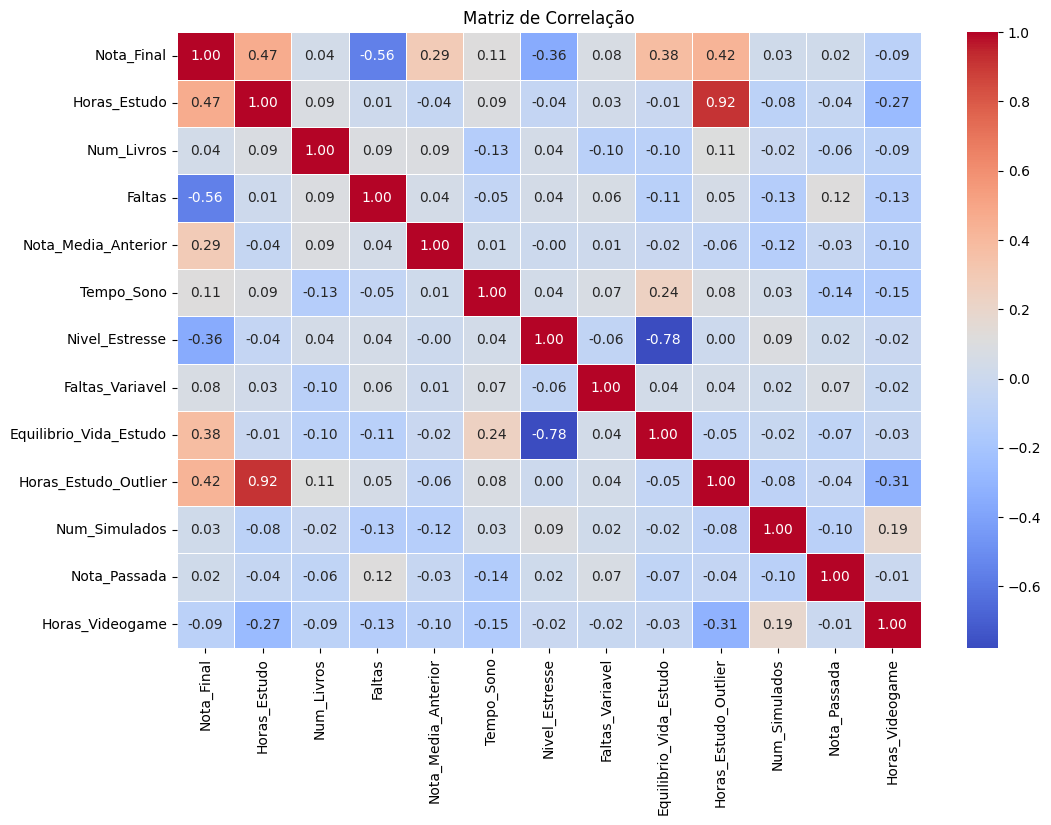

In [221]:
ax, fig = plt.subplots(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

**Outliers**

### 1) verificando a linearidade por meio do grafico

In [222]:
lista = df.columns.to_list()
lista.remove('Nota_Final')
lista

['Horas_Estudo',
 'Num_Livros',
 'Faltas',
 'Nota_Media_Anterior',
 'Tempo_Sono',
 'Nivel_Estresse',
 'Faltas_Variavel',
 'Equilibrio_Vida_Estudo',
 'Horas_Estudo_Outlier',
 'Num_Simulados',
 'Nota_Passada',
 'Horas_Videogame']

In [223]:
fig =px.scatter(df, x='Horas_Estudo', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Num_Livros', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Faltas', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Nota_Media_Anterior', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Tempo_Sono', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Nivel_Estresse', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Faltas_Variavel', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Equilibrio_Vida_Estudo', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Horas_Estudo_Outlier', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Num_Simulados', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Nota_Passada', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

fig =px.scatter(df, x='Horas_Videogame', y='Nota_Final', trendline='ols', trendline_color_override='red')
fig.show()

### Análise da Matriz de Correlação

In [224]:
# Definindo a variável dependente e as variáveis independentes
target = "Nota_Final"
X = df.drop(columns=[target])  # Variáveis preditoras
y= df[target]  # Variável dependente

# Ajustando o modelo de regressão linear
X_const = sm.add_constant(X)  # Adicionando intercepto
modelo = sm.OLS(y, X_const).fit()

# Calculando o teste de Durbin-Watson para independência dos erros
dw_stat = durbin_watson(modelo.resid)

# Exibindo o resultado
print(f"Estatística de Durbin-Watson: {dw_stat:.4f}")

# Interpretação do teste de Durbin-Watson
if dw_stat < 1.5:
    print("Indício forte de autocorrelação positiva nos resíduos.")
elif dw_stat > 2.5:
    print("Indício forte de autocorrelação negativa nos resíduos.")
else:
    print("Não há evidências fortes de autocorrelação nos resíduos.")

Estatística de Durbin-Watson: 2.0072
Não há evidências fortes de autocorrelação nos resíduos.


Conclusão não há auto correlação pois o resultado foi que não há evidênias fortes de autocorrelação nos residuos

### Calculando se há heterocedasticidade

In [225]:
# Calculando o teste de Breusch-Pagan para homocedasticidade
bp_test = het_breuschpagan(modelo.resid, X_const)

# Extraindo o p-valor do teste
p_value_bp = bp_test[1]

# Exibindo os resultados
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

# Interpretando o resultado
if p_value_bp < 0.05:
    print("O modelo apresenta heterocedasticidade significativa (variância dos erros não é constante).")
else:
    print("Não há evidências fortes de heterocedasticidade (variância dos erros é aproximadamente constante).")


Teste de Breusch-Pagan: p-valor = 0.02435
O modelo apresenta heterocedasticidade significativa (variância dos erros não é constante).


In [226]:
def testar_heterocedasticidade_removendo(df, target, variavel_removida):
    """
    Testa a heterocedasticidade removendo uma variável específica do modelo.

    Parâmetros:
    df (pd.DataFrame): O dataframe contendo os dados.
    target (str): A variável dependente do modelo.
    variavel_removida (str): A variável independente a ser removida para teste.

    Retorna:
    dict: Contendo os p-valores do modelo completo e do modelo sem a variável removida.
    """
    X = df.drop(columns=[target])  # Variáveis regressoras
    y = df[target]  # Variável de interesse

    # Modelo completo
    X_const = sm.add_constant(X)
    modelo_completo = sm.OLS(y, X_const).fit()
    p_value_completo = het_breuschpagan(modelo_completo.resid, X_const)[1]

    # Modelo sem a variável especificada
    if variavel_removida not in X.columns:
        return {"Erro": f"A variável '{variavel_removida}' não está no dataset."}

    X_reduzido = X.drop(columns=[variavel_removida])
    X_reduzido_const = sm.add_constant(X_reduzido)
    modelo_reduzido = sm.OLS(y, X_reduzido_const).fit()
    p_value_reduzido = het_breuschpagan(modelo_reduzido.resid, X_reduzido_const)[1]

    return {
        "p-valor (Modelo Completo)": p_value_completo,
        f"p-valor (Sem variável removida '{variavel_removida}')": p_value_reduzido,
        "Conclusão": "Removendo a variável resolve o problema" if p_value_reduzido > 0.05 else "Ainda há heterocedasticidade"
    }

for var in df.drop(columns=[target]).columns:
  # Testando a função removendo a variável "Frete_Pago"
  resultado_teste = testar_heterocedasticidade_removendo(df, "Nota_Final", var)
  print(resultado_teste)

{'p-valor (Modelo Completo)': np.float64(0.024353427448875774), "p-valor (Sem variável removida 'Horas_Estudo')": np.float64(0.023580270925338955), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Completo)': np.float64(0.024353427448875774), "p-valor (Sem variável removida 'Num_Livros')": np.float64(0.018222984997735264), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Completo)': np.float64(0.024353427448875774), "p-valor (Sem variável removida 'Faltas')": np.float64(0.618614763310724), 'Conclusão': 'Removendo a variável resolve o problema'}
{'p-valor (Modelo Completo)': np.float64(0.024353427448875774), "p-valor (Sem variável removida 'Nota_Media_Anterior')": np.float64(0.17269353999597772), 'Conclusão': 'Removendo a variável resolve o problema'}
{'p-valor (Modelo Completo)': np.float64(0.024353427448875774), "p-valor (Sem variável removida 'Tempo_Sono')": np.float64(0.015984989489399803), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Co

In [227]:
df1 = df.copy()
df1.drop(columns=['Faltas_Variavel'], inplace=True)
# Definindo a variável dependente e as variáveis independentes
target = "Nota_Final"
X1 = df1.drop(columns=[target])  # Variáveis preditoras
y1= df1[target]  # Variável dependente

# Ajustando o modelo de regressão linear
X1_const = sm.add_constant(X1)  # Adicionando intercepto
modelo = sm.OLS(y1, X1_const).fit()

In [228]:
# Calculando o teste de Breusch-Pagan para homocedasticidade
bp_test = het_breuschpagan(modelo.resid, X1_const)

# Extraindo o p-valor do teste
p_value_bp = bp_test[1]

# Exibindo os resultados
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

# Interpretando o resultado
if p_value_bp < 0.05:
    print("O modelo apresenta heterocedasticidade significativa (variância dos erros não é constante).")
else:
    print("Não há evidências fortes de heterocedasticidade (variância dos erros é aproximadamente constante).")


Teste de Breusch-Pagan: p-valor = 0.46825
Não há evidências fortes de heterocedasticidade (variância dos erros é aproximadamente constante).


In [229]:
df.corr()['Nota_Final']

,Nota_Final
Nota_Final,1.000000
Horas_Estudo,0.469011
Num_Livros,0.036392
Faltas,-0.557353
Nota_Media_Anterior,0.290609
Tempo_Sono,0.113403
Nivel_Estresse,-0.357139
Faltas_Variavel,0.075309
Equilibrio_Vida_Estudo,0.377588
Horas_Estudo_Outlier,0.424769


Conclusão optamos por tirar Faltas_variavel entre as opçõs Faltas, Faltas_Variaveis, nota_passada, nota_media_anterior pois o p_valor de faltas_variavel melhorou no modelo ela ficou o 2 p_valor mais alto o maior p_valor foi de faltas porem ao voltarmos no grafico e analisarmos a correlação entre nosso target(Nota_final) faltas tem mais correlação que faltas_variavel portanto retiramos a coluna falta_variavel

### Verificando se segue uma normalidade

In [230]:
# Definindo a variável dependente e as variáveis independentes
target = "Nota_Final"
X= df.drop(columns=[target])  # Variáveis preditoras
y = df[target]  # Variável dependente

# Ajustando o modelo de regressão linear
X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

# Teste de normalidade de Shapiro-Wilk nos resíduos do modelo
shapiro_test = shapiro(modelo.resid)

# Extraindo o p-valor do teste
p_value_shapiro = shapiro_test[1]

# Exibindo os resultados
print(f"Teste de Shapiro-Wilk: p-valor = {p_value_shapiro:.5f}")

# Interpretando o resultado
if p_value_shapiro < 0.05:
    print("Os resíduos não seguem uma distribuição normal.")
else:
    print("Os resíduos seguem uma distribuição aproximadamente normal.")


Teste de Shapiro-Wilk: p-valor = 0.31406
Os resíduos seguem uma distribuição aproximadamente normal.


### Verificando se há multicolinearidade

In [231]:
# Criando a matriz de variáveis independentes (sem a variável dependente)
X = df.drop(columns=["Nota_Final"])
X_const = sm.add_constant(X)  # Adicionando o intercepto

# Calculando o VIF para cada variável
vif_values = {X.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))}

# Exibindo os resultados
print("Variância Inflation Factor (VIF) para cada variável:")
for var, vif in vif_values.items():
    status = "Possível multicolinearidade" if vif > 10 else "OK"
    print(f"{var}: VIF = {vif:.2f} → {status}")


Variância Inflation Factor (VIF) para cada variável:
Horas_Estudo: VIF = 6.31 → OK
Num_Livros: VIF = 1.07 → OK
Faltas: VIF = 1.07 → OK
Nota_Media_Anterior: VIF = 1.05 → OK
Tempo_Sono: VIF = 1.32 → OK
Nivel_Estresse: VIF = 3.08 → OK
Faltas_Variavel: VIF = 1.03 → OK
Equilibrio_Vida_Estudo: VIF = 3.25 → OK
Horas_Estudo_Outlier: VIF = 6.51 → OK
Num_Simulados: VIF = 1.09 → OK
Nota_Passada: VIF = 1.06 → OK
Horas_Videogame: VIF = 1.21 → OK


In [232]:
df.corr()['Horas_Estudo']

,Horas_Estudo
Nota_Final,0.469011
Horas_Estudo,1.000000
Num_Livros,0.086421
Faltas,0.011880
Nota_Media_Anterior,-0.041000
Tempo_Sono,0.091928
Nivel_Estresse,-0.042507
Faltas_Variavel,0.032772
Equilibrio_Vida_Estudo,-0.014606
Horas_Estudo_Outlier,0.915007


In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [234]:
explicativa1 = ['const','Horas_Estudo','Num_Livros','Faltas','Nota_Media_Anterior','Tempo_Sono','Nivel_Estresse','Faltas_Variavel','Equilibrio_Vida_Estudo','Horas_Estudo_Outlier',
'Num_Simulados','Nota_Passada','Horas_Videogame']

explicativa2 = ['const','Num_Livros','Faltas','Nota_Media_Anterior','Tempo_Sono','Nivel_Estresse','Faltas_Variavel','Equilibrio_Vida_Estudo','Horas_Estudo_Outlier',
'Num_Simulados','Nota_Passada','Horas_Videogame']

explicativa3 = ['const','Horas_Estudo','Num_Livros','Faltas','Nota_Media_Anterior','Tempo_Sono','Nivel_Estresse','Faltas_Variavel','Equilibrio_Vida_Estudo',
'Num_Simulados','Nota_Passada','Horas_Videogame']

In [235]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativa1

vif_1["vif"] = [variance_inflation_factor(X_const[explicativa1], i) for i in range(len(explicativa1))]

vif_2 = pd.DataFrame()
vif_2["variavel"] = explicativa2

vif_2["vif"] = [variance_inflation_factor(X_const[explicativa2], i) for i in range(len(explicativa2))]

vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativa3

vif_3["vif"] = [variance_inflation_factor(X_const[explicativa3], i) for i in range(len(explicativa3))]


In [236]:
vif_1

,variavel,vif
0,const,77.193900
1,Horas_Estudo,6.309564
2,Num_Livros,1.073140
3,Faltas,1.074964
4,Nota_Media_Anterior,1.046550
5,Tempo_Sono,1.321005
6,Nivel_Estresse,3.075762
7,Faltas_Variavel,1.034398
8,Equilibrio_Vida_Estudo,3.254526
9,Horas_Estudo_Outlier,6.509134


In [237]:
vif_2

,variavel,vif
0,const,76.902883
1,Num_Livros,1.073061
2,Faltas,1.067985
3,Nota_Media_Anterior,1.045705
4,Tempo_Sono,1.316274
5,Nivel_Estresse,3.054392
6,Faltas_Variavel,1.034305
7,Equilibrio_Vida_Estudo,3.251879
8,Horas_Estudo_Outlier,1.158668
9,Num_Simulados,1.090667


In [238]:
vif_3

,variavel,vif
0,const,76.748934
1,Horas_Estudo,1.123143
2,Num_Livros,1.070765
3,Faltas,1.069573
4,Nota_Media_Anterior,1.040999
5,Tempo_Sono,1.320763
6,Nivel_Estresse,3.073375
7,Faltas_Variavel,1.033784
8,Equilibrio_Vida_Estudo,3.251213
9,Num_Simulados,1.091592


In [239]:
df

,Nota_Final,Horas_Estudo,Num_Livros,Faltas,Nota_Media_Anterior,Tempo_Sono,Nivel_Estresse,Faltas_Variavel,Equilibrio_Vida_Estudo,Horas_Estudo_Outlier,Num_Simulados,Nota_Passada,Horas_Videogame
0,16.599456,9.890115,5,16,4.196953,7.886352,7.904943,26,1.368938,9.890115,4,7.185572,2.033630
1,25.115333,5.495447,1,9,0.805869,9.186604,1.861121,28,5.293959,5.495447,3,6.677577,3.246115
2,5.094084,2.814473,3,5,0.825483,4.757503,8.968963,23,0.507127,2.814473,3,7.468304,3.205141
3,1.858906,0.772896,6,22,1.420267,4.238826,8.548218,11,0.624122,0.772896,6,6.708548,4.123225
4,23.171554,4.444695,2,1,3.180209,8.759010,1.804465,3,4.576815,4.444695,2,6.742929,2.050743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,14.673169,4.783761,9,18,8.478589,4.903877,5.550262,13,1.081664,4.783761,1,4.027295,3.135492
146,18.228726,4.109843,1,9,7.315547,5.722580,3.008259,13,1.681799,4.109843,2,3.843084,4.484675
147,17.503360,4.219994,5,7,5.350915,9.878600,5.406921,11,2.078027,4.219994,2,4.165618,4.970417
148,18.875406,1.517107,5,5,3.394520,9.750112,3.847697,11,2.590920,1.517107,2,3.651616,2.338652


In [240]:
lista

['Horas_Estudo',
 'Num_Livros',
 'Faltas',
 'Nota_Media_Anterior',
 'Tempo_Sono',
 'Nivel_Estresse',
 'Faltas_Variavel',
 'Equilibrio_Vida_Estudo',
 'Horas_Estudo_Outlier',
 'Num_Simulados',
 'Nota_Passada',
 'Horas_Videogame']

### testando nosso modelo

In [241]:
# Definindo a variável dependente e a variável independente escolhida
target = "Nota_Final"
X_final = df.drop(columns=[target])# Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = df[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final1 = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final1.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")# >0.05

p_value_completo = shapiro(modelo_final1.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")#>0.05

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final1.rsquared_adj
print(f"R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final1.summary())

{'Horas_Estudo': np.float64(6.309563798202493), 'Num_Livros': np.float64(1.0731401227384325), 'Faltas': np.float64(1.0749640461610441), 'Nota_Media_Anterior': np.float64(1.0465501993592683), 'Tempo_Sono': np.float64(1.3210047060979868), 'Nivel_Estresse': np.float64(3.0757621676463986), 'Faltas_Variavel': np.float64(1.0343976364974028), 'Equilibrio_Vida_Estudo': np.float64(3.2545263634895916), 'Horas_Estudo_Outlier': np.float64(6.509134478132646), 'Num_Simulados': np.float64(1.0919078738733548), 'Nota_Passada': np.float64(1.0616787310833193), 'Horas_Videogame': np.float64(1.2076425475872992)}
Teste de Breusch-Pagan: p-valor = 0.02435
Shapiro: p-valor = 0.31406
R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': 0.78977
                            OLS Regression Results                            
Dep. Variable:             Nota_Final   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Le

In [242]:
# Definindo a variável dependente e a variável independente escolhida
target = "Nota_Final"
X_final = df[['Horas_Estudo','Num_Livros','Faltas','Nota_Media_Anterior','Tempo_Sono','Nivel_Estresse','Faltas_Variavel','Equilibrio_Vida_Estudo',
'Num_Simulados','Nota_Passada','Horas_Videogame']]  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = df[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final2 = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final2.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")# >0.05

p_value_completo = shapiro(modelo_final2.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")#>0.05

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final2.rsquared_adj
print(f"R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final2.summary())

{'Horas_Estudo': np.float64(6.309563798202493), 'Num_Livros': np.float64(1.0731401227384325), 'Faltas': np.float64(1.0749640461610441), 'Nota_Media_Anterior': np.float64(1.0465501993592683), 'Tempo_Sono': np.float64(1.3210047060979868), 'Nivel_Estresse': np.float64(3.0757621676463986), 'Faltas_Variavel': np.float64(1.0343976364974028), 'Equilibrio_Vida_Estudo': np.float64(3.2545263634895916), 'Num_Simulados': np.float64(6.509134478132646), 'Nota_Passada': np.float64(1.0919078738733548), 'Horas_Videogame': np.float64(1.0616787310833193)}
Teste de Breusch-Pagan: p-valor = 0.03128
Shapiro: p-valor = 0.15299
R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': 0.78083
                            OLS Regression Results                            
Dep. Variable:             Nota_Final   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     47.96
Dat

In [243]:
# Definindo a variável dependente e a variável independente escolhida
target = "Nota_Final"
X_final = df[['Horas_Estudo','Num_Livros','Faltas','Nota_Media_Anterior','Tempo_Sono','Nivel_Estresse','Equilibrio_Vida_Estudo','Horas_Estudo_Outlier',
'Num_Simulados','Nota_Passada','Horas_Videogame']]  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = df[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final3 = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final3.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")# >0.05

p_value_completo = shapiro(modelo_final3.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")#>0.05

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final3.rsquared_adj
print(f"R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final3.summary())

{'Horas_Estudo': np.float64(6.309563798202493), 'Num_Livros': np.float64(1.0731401227384325), 'Faltas': np.float64(1.0749640461610441), 'Nota_Media_Anterior': np.float64(1.0465501993592683), 'Tempo_Sono': np.float64(1.3210047060979868), 'Nivel_Estresse': np.float64(3.0757621676463986), 'Equilibrio_Vida_Estudo': np.float64(1.0343976364974028), 'Horas_Estudo_Outlier': np.float64(3.2545263634895916), 'Num_Simulados': np.float64(6.509134478132646), 'Nota_Passada': np.float64(1.0919078738733548), 'Horas_Videogame': np.float64(1.0616787310833193)}
Teste de Breusch-Pagan: p-valor = 0.46825
Shapiro: p-valor = 0.05162
R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': 0.78702
                            OLS Regression Results                            
Dep. Variable:             Nota_Final   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     49.7

In [244]:
# Definindo a variável dependente e a variável independente escolhida
target = "Nota_Final"
X_final = df[['Horas_Estudo','Num_Livros','Faltas','Nota_Media_Anterior','Tempo_Sono','Nivel_Estresse','Equilibrio_Vida_Estudo',
'Num_Simulados','Nota_Passada','Horas_Videogame']]  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = df[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final3 = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final3.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")# >0.05

p_value_completo = shapiro(modelo_final3.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")#>0.05

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final3.rsquared_adj
print(f"R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final3.summary())

{'Horas_Estudo': np.float64(6.309563798202493), 'Num_Livros': np.float64(1.0731401227384325), 'Faltas': np.float64(1.0749640461610441), 'Nota_Media_Anterior': np.float64(1.0465501993592683), 'Tempo_Sono': np.float64(1.3210047060979868), 'Nivel_Estresse': np.float64(3.0757621676463986), 'Equilibrio_Vida_Estudo': np.float64(1.0343976364974028), 'Num_Simulados': np.float64(3.2545263634895916), 'Nota_Passada': np.float64(6.509134478132646), 'Horas_Videogame': np.float64(1.0919078738733548)}
Teste de Breusch-Pagan: p-valor = 0.65594
Shapiro: p-valor = 0.02279
R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': 0.77783
                            OLS Regression Results                            
Dep. Variable:             Nota_Final   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     51.77
Date:                Fri, 21 Mar 2025   Prob (F-statis

In [245]:
# Definindo a variável dependente e a variável independente escolhida
target = "Nota_Final"
X_final = df[['Horas_Estudo','Faltas','Nota_Media_Anterior','Equilibrio_Vida_Estudo','Nota_Passada','Nivel_Estresse','Horas_Estudo_Outlier']]  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = df[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final4 = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final4.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")# >0.05

p_value_completo = shapiro(modelo_final4.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")#>0.05

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final4.rsquared_adj
print(f"R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final4.summary())

{'Horas_Estudo': np.float64(6.309563798202493), 'Faltas': np.float64(1.0731401227384325), 'Nota_Media_Anterior': np.float64(1.0749640461610441), 'Equilibrio_Vida_Estudo': np.float64(1.0465501993592683), 'Nota_Passada': np.float64(1.3210047060979868), 'Nivel_Estresse': np.float64(3.0757621676463986), 'Horas_Estudo_Outlier': np.float64(1.0343976364974028)}
Teste de Breusch-Pagan: p-valor = 0.26074
Shapiro: p-valor = 0.47810
R² Ajustado do modelo final com apenas 'Orcamento_Anuncios': 0.78517
                            OLS Regression Results                            
Dep. Variable:             Nota_Final   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     76.71
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.95e-44
Time:                        01:23:11   Log-Likelihood:                -383.60
No. Observations:              

### Testando modelo com treino e teste

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
dados = df.copy()

In [248]:
# Definindo y e X
y = dados['Nota_Final']
X = dados.drop(columns = 'Nota_Final')

In [249]:
#Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 2330)

In [250]:
#Dados de treino para usar a fórmula

df_train = pd.DataFrame(data= X_train )
df_train['Nota_Final'] = y_train

In [251]:
# import ols
from statsmodels.formula.api import ols

In [252]:
# adicionando o constante
X_train = sm.add_constant(X_train)

In [290]:
# Modelo final
modelo_3 = sm.OLS(y_train,
                  X_train[['const','Horas_Estudo','Faltas','Nota_Media_Anterior','Equilibrio_Vida_Estudo','Nota_Passada','Horas_Estudo_Outlier']]).fit()

In [291]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Nota_Final   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     53.39
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           2.67e-28
Time:                        01:37:47   Log-Likelihood:                -264.39
No. Observations:                 102   AIC:                             542.8
Df Residuals:                      95   BIC:                             561.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

In [255]:
modelo_3.params

,0
const,6.602454
Horas_Estudo,0.570438
Faltas,-0.483656
Nota_Media_Anterior,0.851279
Equilibrio_Vida_Estudo,1.327195
Nota_Passada,0.396059
Horas_Estudo_Outlier,0.673869


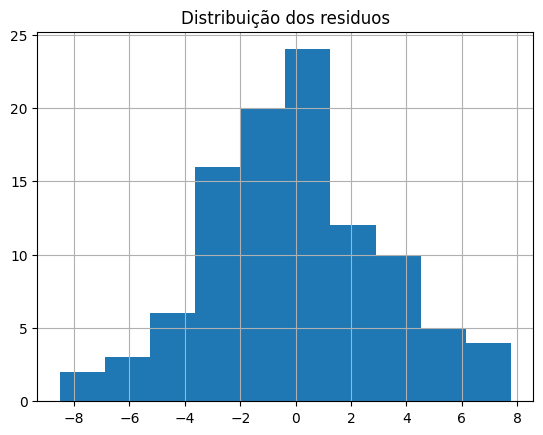

In [256]:
modelo_3.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()

Analisando o grafico notamos que os residuos seguem um distribuição normal

In [257]:
p_value_completo = shapiro(modelo_3.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")#>0.05

Shapiro: p-valor = 0.82859


In [258]:
X_test.columns

Index(['Horas_Estudo', 'Num_Livros', 'Faltas', 'Nota_Media_Anterior',
       'Tempo_Sono', 'Nivel_Estresse', 'Faltas_Variavel',
       'Equilibrio_Vida_Estudo', 'Horas_Estudo_Outlier', 'Num_Simulados',
       'Nota_Passada', 'Horas_Videogame'],
      dtype='object')

In [259]:
X_test = sm.add_constant(X_test)#é necessario adicionar uma constante no x_test então é inseriado a constante

In [260]:
predict_3 =modelo_3.predict(X_test[['const','Horas_Estudo','Faltas','Nota_Media_Anterior','Equilibrio_Vida_Estudo','Nota_Passada','Horas_Estudo_Outlier']])

In [265]:
print(modelo_3.rsquared)

0.7712805683185199


In [263]:
from sklearn.metrics import r2_score
print("R²: ", r2_score(y_test,predict_3 ))

R²:  0.7943028906064202
